In [3]:
# Random games configurations

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve  # For finding roots
from numpy.linalg import eig  # For eigenvalue calculations
import pandas as pd

# Number of game configurations to generate
num_samples = 100000

# Create an empty list to store the data for the Excel file
data = []
game_counter = 1

for _ in range(num_samples):
    # Randomly generate parameter values
    w = np.round(np.random.uniform(0, 1), 2)  # a < w
    c = np.round(np.random.uniform(0, 1), 2)  # 0 < c < 1
    a = np.round(np.random.uniform(c, 2*w), 2)# c < a
    d = np.round(np.random.uniform(0, 1), 2)  # 0 < d < 1
    b = np.round(np.random.uniform(d, w), 2)  # d < b < w
    v = np.round(np.random.uniform(0, 1), 2)  # 0 ≤ v ≤ 1
    m = 0
    n = 0
    s = 0
    p = 0

    # Define the replicator dynamics equations
    def F_beta(beta, alpha):
        return beta * (1 - beta) * (b - d - b*alpha + v*b*alpha + v*w*alpha)

    def F_alpha(alpha, beta):
        return alpha * (1 - alpha) * (-c + a - m*p - a*v*beta - v*n*s*beta + v*m*p*beta)

    # Jacobian matrix to determine stability
    def jacobian(beta, alpha):
        dF_beta_dalpha = beta * (1 - beta) * (-b + v*b + v*w)
        dF_alpha_dbeta = alpha * (1 - alpha) * (-a*v - v*n*s + v*m*p)
        dF_beta_dbeta = (1 - 2*beta) * (b - d - b*alpha + v*b*alpha + v*w*alpha)
        dF_alpha_dalpha = (1 - 2*alpha) * (-c + a - m*p - a*v*beta - v*n*s*beta + v*m*p*beta)

        return np.array([[dF_beta_dbeta, dF_beta_dalpha], [dF_alpha_dbeta, dF_alpha_dalpha]])

    # Define equilibrium points (corner points)
    equilibrium_points = [(0, 0), (0, 1), (1, 0), (1, 1)]

    if (v*b - b + v*w) == 0:
      pass
    else:
      beta_internal = round((d - b) / (v*b - b + v*w), 2)
    if v*(a - m*p + n*s)==0 :
      pass
    else:
      alpha_internal = round((a - c - m*p) / (v*(a - m*p + n*s)),2)

    # Check if the internal equilibrium point is within the [0, 1] range
    internal_stability = None
    if 0 <= alpha_internal <= 1 and 0 <= beta_internal <= 1:
        equilibrium_points.append((beta_internal, alpha_internal))
        internal_label = "internal"
    else:
        internal_label = "no_internal"

    # Store stability information for each equilibrium point in a dictionary
    stability_dict = {}
    for i, (beta_eq, alpha_eq) in enumerate(equilibrium_points):
        point_label = f"({beta_eq},{alpha_eq})" if i < 4 else internal_label

        J = jacobian(beta_eq, alpha_eq)
        eigenvalues = eig(J)[0]

        if np.all(np.real(eigenvalues) < 0):
            stability = 1  # Stable
        else:
            stability = 0  # Not Stable

        stability_dict[point_label + "_stability"] = stability

    # Append a single row for this game configuration with stability data for each point
    row_data = [game_counter, a, b, c, d, w, v] + list(stability_dict.values())
    data.append(row_data)
    game_counter += 1

# Create a pandas DataFrame from the consolidated data list
columns = ['game', 'a', 'b', 'c', 'd', 'w', 'v', '(0,0)', '(0,1)', '(1,0)', '(1,1)', 'internal_eq']
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to an Excel file
df.to_excel('Random_games_stability2.xlsx', index=False)

print('Excel file "Random_games_stability2.xlsx" has been created.')


Excel file "Random_games_stability2.xlsx" has been created.


In [5]:
# Calculate mean, median and standard deviation of each parameter and total of each equilibrium point

import pandas as pd

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Calculate statistics for each parameter
parameter_stats = df[['a', 'b', 'c', 'd', 'w', 'v']].agg(['mean', 'median', 'std'])

# Calculate the total for each equilibrium point
equilibrium_totals = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)', 'internal_eq']].sum()

print("Parameter Statistics:")
print(parameter_stats)
print("\nEquilibrium Point Totals:")
print(equilibrium_totals)

Parameter Statistics:
               a         b         c         d         w         v
mean    0.748891  0.500946  0.499334  0.501237  0.500007  0.500516
median  0.710000  0.500000  0.500000  0.500000  0.500000  0.500000
std     0.400196  0.235879  0.288794  0.288189  0.289038  0.288568

Equilibrium Point Totals:
(0,0)          19126.0
(0,1)          32212.0
(1,0)          26942.0
(1,1)          12100.0
internal_eq     3434.0
dtype: float64


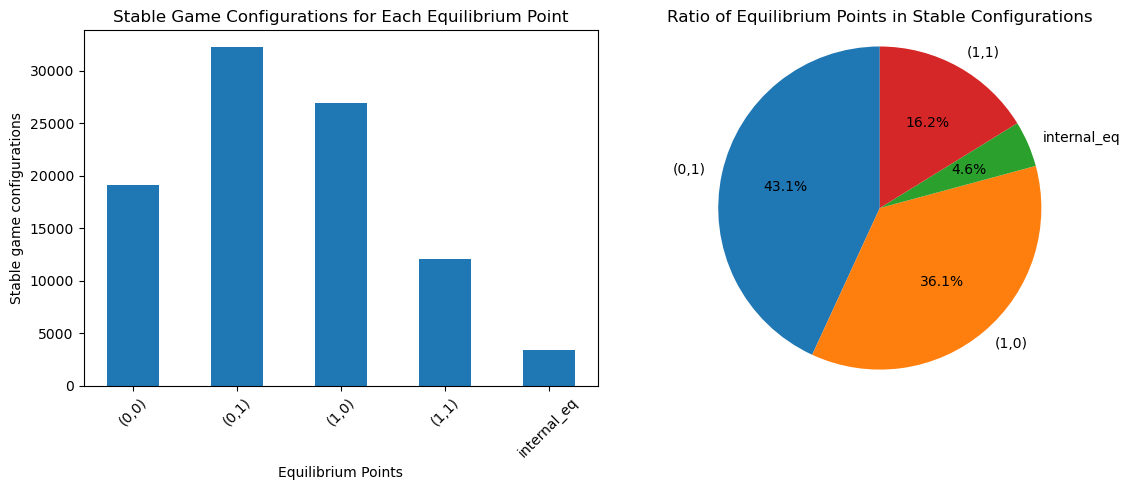

In [47]:
# Ratio of stability points in game configurations

import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Calculate the number of stable configurations for each equilibrium point
equilibrium_counts = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)', 'internal_eq']].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot (subplot 1)
ax1.bar(equilibrium_counts.index, equilibrium_counts.values, width=0.5)
ax1.set_xlabel('Equilibrium Points')
ax1.set_ylabel('Stable game configurations')
ax1.set_title('Stable Game Configurations for Each Equilibrium Point')
ax1.tick_params(axis='x', rotation=45)

# Pie plot (subplot 2)
equilibrium_counts_pie = df[['(0,1)', '(1,0)', 'internal_eq', '(1,1)']].sum()
ax2.pie(equilibrium_counts_pie, labels=equilibrium_counts_pie.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Equilibrium Points in Stable Configurations')
ax2.axis('equal')

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig("Attack_Defence/6.png")
# Show the plot
plt.show()

In [9]:
# Parameter relationship when equilibrium points (1,0), (0,1) and (1,1) are stable

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Filter the DataFrame to include only rows where (1,0), (0,1), and internal equilibrium are stable
filtered_df = df[(df['(0,1)'] == 1) & (df['(1,0)'] == 1) & (df['internal_eq'] == 1)]

# Analyze the relationship between a and b, c and d, and w
if not filtered_df.empty:
  print("When (1,0), (0,1), and (1,1) are stable:")

  # a to b relationship
  a_greater_than_b = filtered_df['a'] > filtered_df['b']
  a_equal_to_b = filtered_df['a'] == filtered_df['b']
  a_less_than_b = filtered_df['a'] < filtered_df['b']
  print("a to b:")
  print(f"Percentage of cases where a > b: {(a_greater_than_b.sum() / len(filtered_df)) * 100:.2f}%")
  print(f"Percentage of cases where a = b: {(a_equal_to_b.sum() / len(filtered_df)) * 100:.2f}%")
  print(f"Percentage of cases where a < b: {(a_less_than_b.sum() / len(filtered_df)) * 100:.2f}%")

  # c to d relationship
  c_greater_than_d = filtered_df['c'] > filtered_df['d']
  c_equal_to_d = filtered_df['c'] == filtered_df['d']
  c_less_than_d = filtered_df['c'] < filtered_df['d']
  print("c to d:")
  print(f"Percentage of cases where c > d: {(c_greater_than_d.sum() / len(filtered_df)) * 100:.2f}%")
  print(f"Percentage of cases where c = d: {(c_equal_to_d.sum() / len(filtered_df)) * 100:.2f}%")
  print(f"Percentage of cases where c < d: {(c_less_than_d.sum() / len(filtered_df)) * 100:.2f}%")

  # w greater than a,b,c,d
  print("w greater than a,b,c,d:")
  w_greater_than_others = (filtered_df['w'] > filtered_df['a']) & (filtered_df['w'] > filtered_df['b']) & (filtered_df['w'] > filtered_df['c']) & (filtered_df['w'] > filtered_df['d'])
  print(f"Percentage of cases where w > a,b,c,d: {(w_greater_than_others.sum() / len(filtered_df)) * 100:.2f}%")

When (1,0), (0,1), and (1,1) are stable:
a to b:
Percentage of cases where a > b: 83.28%
Percentage of cases where a = b: 0.84%
Percentage of cases where a < b: 15.88%
c to d:
Percentage of cases where c > d: 76.52%
Percentage of cases where c = d: 1.01%
Percentage of cases where c < d: 22.47%
w greater than a,b,c,d:
Percentage of cases where w > a,b,c,d: 20.78%


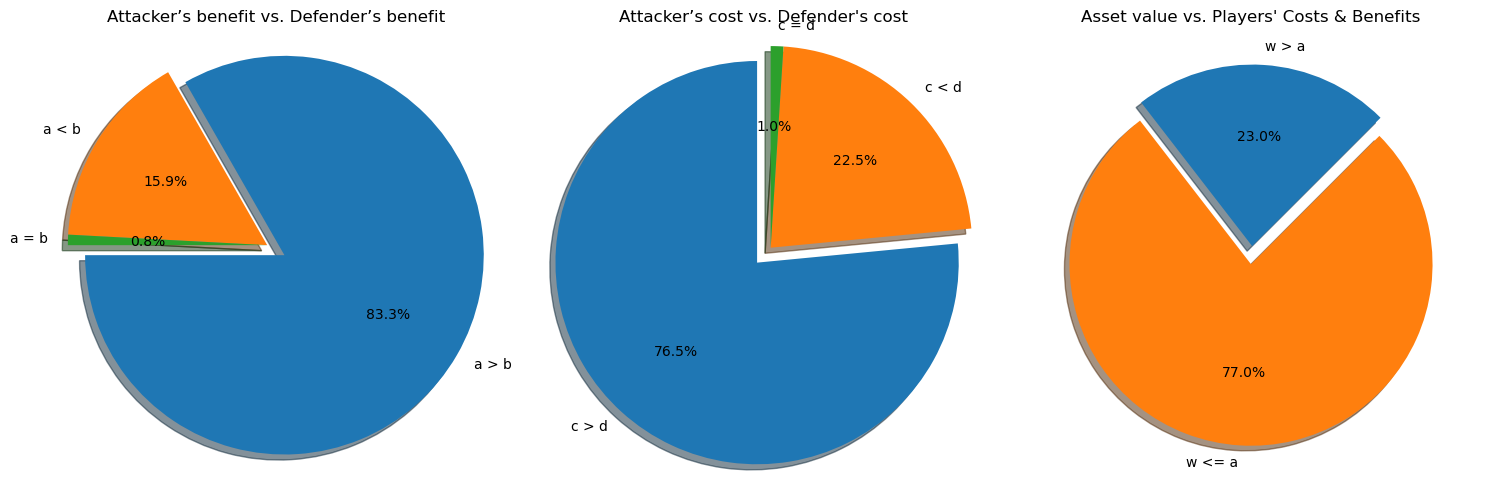

In [49]:
#Pie plots to show parameter relationship when equilibrium points (1,0), (0,1), and internal equilibrium are stable.

import matplotlib.pyplot as plt

# Create a single figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Pie chart for a vs. b
if not filtered_df.empty:
  a_greater_than_b = (filtered_df['a'] > filtered_df['b']).sum()
  a_less_than_b = (filtered_df['a'] < filtered_df['b']).sum()
  a_equal_to_b = (filtered_df['a'] == filtered_df['b']).sum()

  labels = ['a > b', 'a < b', 'a = b']
  sizes = [a_greater_than_b, a_less_than_b, a_equal_to_b]
  explode = (0.1, 0, 0)  # only "explode" the 1st slice

  # Use axes[0] to refer to the first subplot
  axes[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
              shadow=True, startangle=180)
  axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  axes[0].set_title("Attacker’s benefit vs. Defender’s benefit")

  # Pie chart for c vs. d
  c_greater_than_d = (filtered_df['c'] > filtered_df['d']).sum()
  c_less_than_d = (filtered_df['c'] < filtered_df['d']).sum()
  c_equal_to_d = (filtered_df['c'] == filtered_df['d']).sum()

  labels = ['c > d', 'c < d', 'c = d']
  sizes = [c_greater_than_d, c_less_than_d, c_equal_to_d]
  explode = (0.1, 0, 0)  # only "explode" the 1st slice

  # Use axes[1] to refer to the second subplot
  axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
              shadow=True, startangle=90)
  axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  axes[1].set_title("Attacker’s cost vs. Defender's cost")

# Pie chart for w vs. a, b, c, d
  '''w_greater_than_others = ((filtered_df['w'] > filtered_df['a']) &
                           (filtered_df['w'] > filtered_df['b']) &
                           (filtered_df['w'] > filtered_df['c']) &
                           (filtered_df['w'] > filtered_df['d'])).sum()
  w_less_than_or_equal_to_others = len(filtered_df) - w_greater_than_others'''
  w_greater_than_a = (filtered_df['w'] > filtered_df['a']).sum()
  w_less_than_or_equal_to_a = len(filtered_df) - w_greater_than_a

  labels_w = ['w > a', 'w <= a']
  sizes_w = [w_greater_than_a, w_less_than_or_equal_to_a]
  explode_w = (0.1, 0)  # Explode the "Asset value > Players'Cost & Benefits" slice

  # Use axes[2] to refer to the third subplot
  axes[2].pie(sizes_w, explode=explode_w, labels=labels_w, autopct='%1.1f%%',
              shadow=True, startangle=45)
  axes[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  axes[2].set_title("Asset value vs. Players' Costs & Benefits")

plt.tight_layout()
plt.savefig("Attack_Defence/10.png")
plt.show()

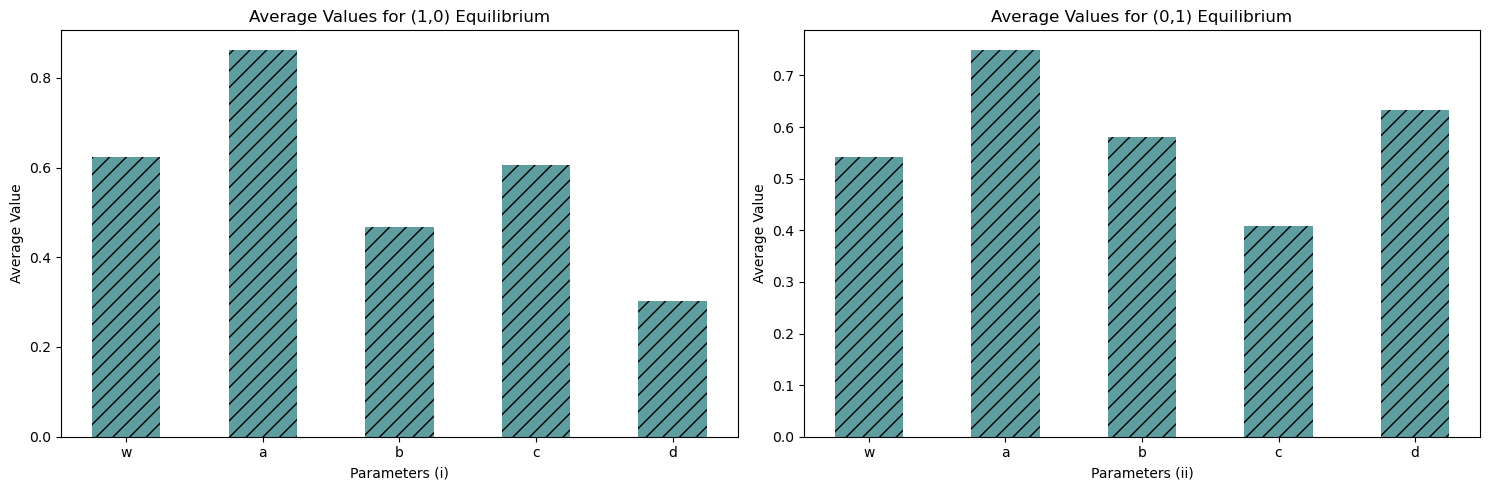

In [51]:
# Plots for average values of w,a,b,c,d for each equilibrium point (1,0),(0,1) and internal_eq.

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Filter the DataFrame for each equilibrium point
df_10 = df[df['(1,0)'] == 1]
df_01 = df[df['(0,1)'] == 1]
#df_internal = df[df['internal_eq'] == 1]

# Calculate the average values of w, a, b, c, and d for each equilibrium point
avg_10 = df_10[['w', 'a', 'b', 'c', 'd']].mean()
avg_01 = df_01[['w', 'a', 'b', 'c', 'd']].mean()
#avg_internal = df_internal[['w', 'a', 'b', 'c', 'd']].mean()

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the bar plots for each equilibrium point
labels = ['w', 'a', 'b', 'c', 'd']

axes[0].bar(labels, avg_10, width=0.5, color='cadetblue', hatch='//')
axes[0].set_xlabel("Parameters (i)")
axes[0].set_ylabel("Average Value")
axes[0].set_title("Average Values for (1,0) Equilibrium")

axes[1].bar(labels, avg_01, width=0.5, color='cadetblue', hatch='//')
axes[1].set_xlabel("Parameters (ii)")
axes[1].set_ylabel("Average Value")
axes[1].set_title("Average Values for (0,1) Equilibrium")

'''axes[2].bar(labels, avg_internal, width=0.5, color='cadetblue', hatch='//')
axes[2].set_xlabel("Parameters (iii)")
axes[2].set_ylabel("Average Value")
axes[2].set_title("Average Parameter Values for Internal Equilibrium")'''

plt.tight_layout()
plt.savefig("Attack_Defence/12.png")
plt.show()


In [15]:
#calculate total stability for each game in 'Random_games_stability.xlsx', save it in another excel file.

import pandas as pd

# Load the Excel file into a DataFrame
excel_filename = "Random_games_stability2.xlsx"
df = pd.read_excel(excel_filename)

# Calculate total stability score (sum of stability for each configuration)
df['Total_Stability'] = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)', 'internal_eq']].sum(axis=1)

# Save the DataFrame with total stability to a new Excel file
output_filename = "Random_games_stability_with_total.xlsx"
df.to_excel(output_filename, index=False)

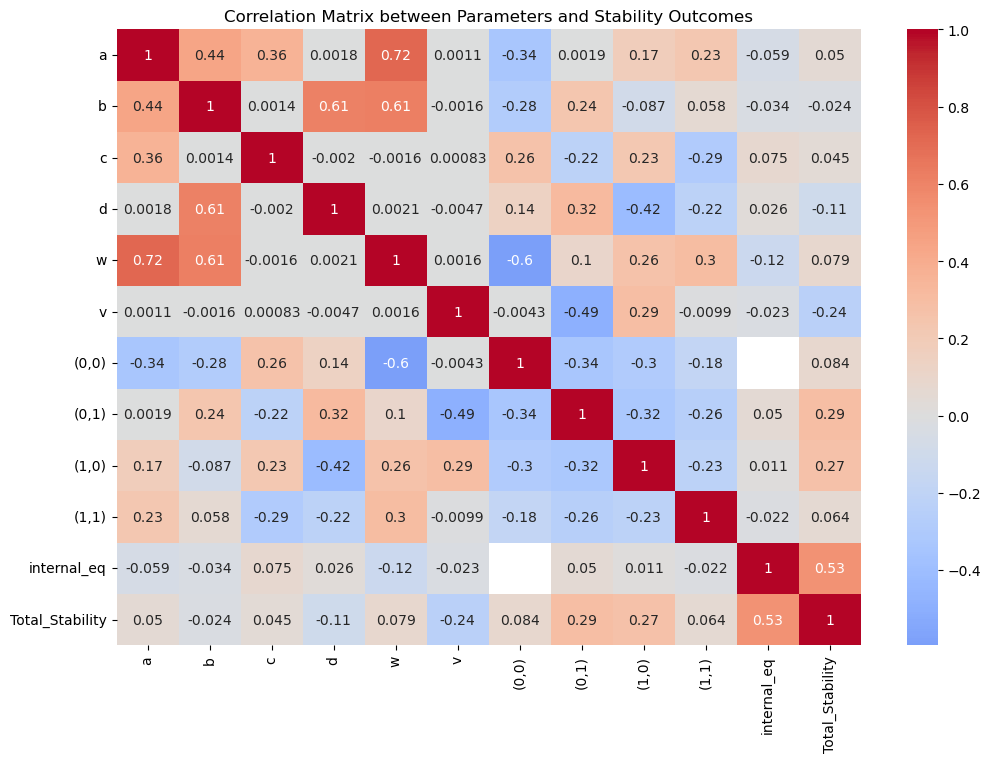

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a DataFrame
excel_filename = "Random_games_stability_with_total.xlsx"
df = pd.read_excel(excel_filename)

# Select only the columns for correlation analysis
columns_for_correlation = ['a', 'b', 'c', 'd', 'w', 'v', '(0,0)', '(0,1)', '(1,0)', '(1,1)', 'internal_eq', 'Total_Stability']
df_correlation = df[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = df_correlation.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Parameters and Stability Outcomes')
plt.show()

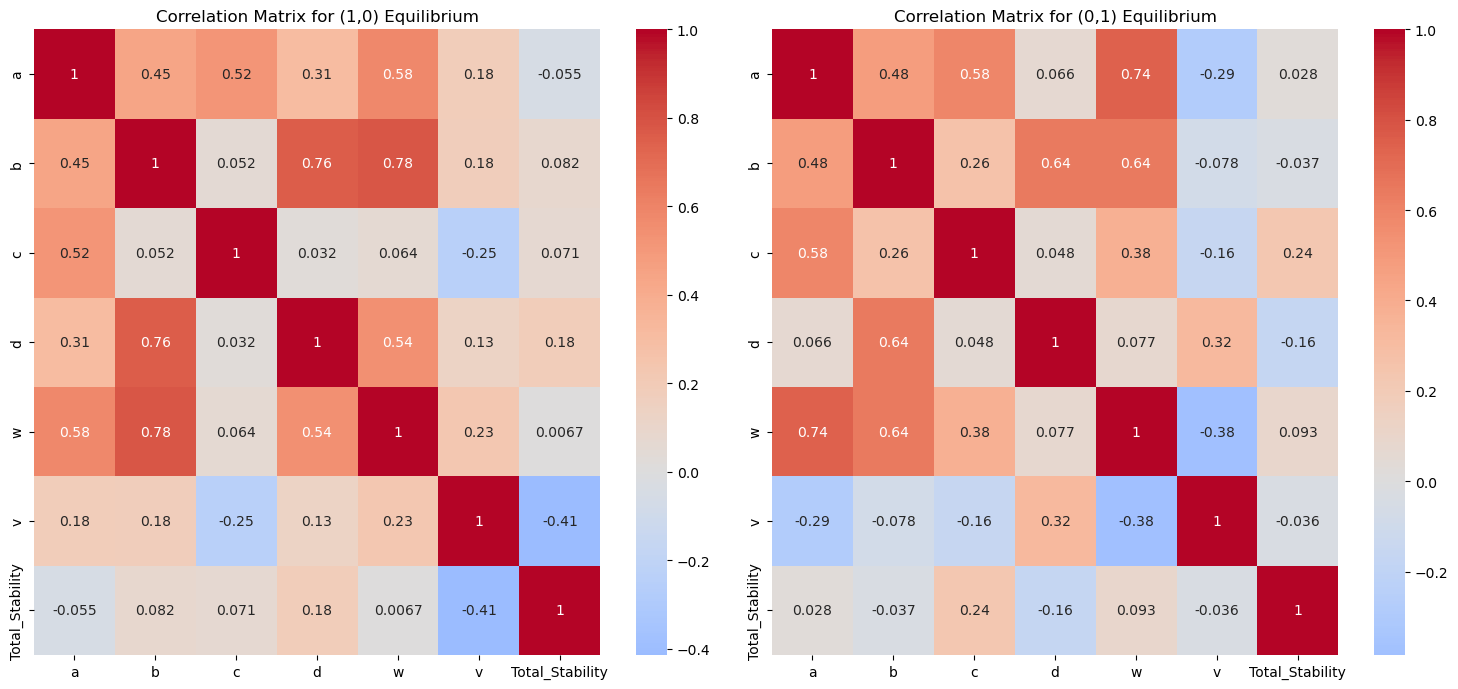

In [53]:
# prompt: code for correlation analysis for each equilibrium point (1,0) and (0,1) separately and show the plots side by side.

# Load the Excel file into a DataFrame
excel_filename = "Random_games_stability_with_total.xlsx"
df = pd.read_excel(excel_filename)

# Filter DataFrames for (1,0) and (0,1) equilibrium points
df_10 = df[df['(1,0)'] == 1]
df_01 = df[df['(0,1)'] == 1]

# Select columns for correlation analysis for (1,0)
columns_for_correlation_10 = ['a', 'b', 'c', 'd', 'w', 'v', 'Total_Stability']
df_correlation_10 = df_10[columns_for_correlation_10]

# Select columns for correlation analysis for (0,1)
columns_for_correlation_01 = ['a', 'b', 'c', 'd', 'w', 'v', 'Total_Stability']
df_correlation_01 = df_01[columns_for_correlation_01]


# Calculate correlation matrices for (1,0) and (0,1)
correlation_matrix_10 = df_correlation_10.corr()
correlation_matrix_01 = df_correlation_01.corr()


# Create subplots for side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot heatmap for (1,0) correlation matrix
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Correlation Matrix for (1,0) Equilibrium')

# Plot heatmap for (0,1) correlation matrix
sns.heatmap(correlation_matrix_01, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Correlation Matrix for (0,1) Equilibrium')

plt.tight_layout()
plt.savefig("Attack_Defence/14.png")
plt.show()

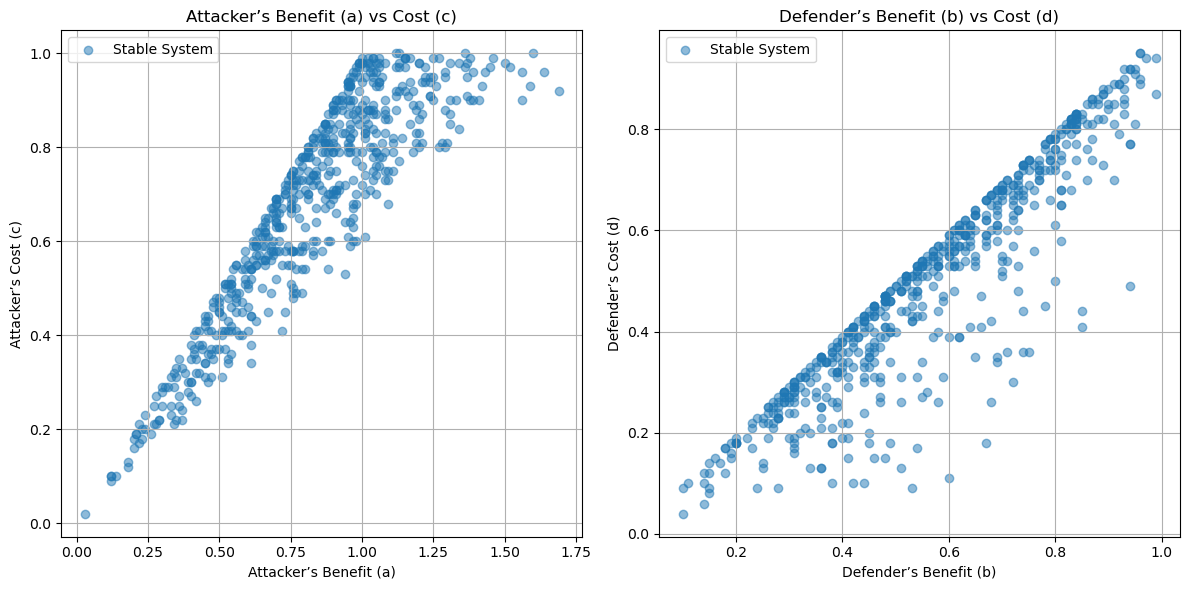

In [55]:
# Scatter plot to show relationship between a vs c and b vs d for system stability when all points (1,0), (0,1) and internal equlibrium are stable.

import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Filter for cases where all equilibrium points are stable
stable_all_df = df[(df['(1,0)'] == 1) & (df['(0,1)'] == 1) & (df['internal_eq'] == 1)]

# Create subplots for side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Scatter plot for a vs c
axes[0].scatter(stable_all_df['a'], stable_all_df['c'], alpha=0.5, label='Stable System')
axes[0].set_xlabel('Attacker’s Benefit (a)')
axes[0].set_ylabel('Attacker’s Cost (c)')
axes[0].set_title('Attacker’s Benefit (a) vs Cost (c)')
axes[0].legend()
axes[0].grid(True)

# Scatter plot for b vs d
axes[1].scatter(stable_all_df['b'], stable_all_df['d'], alpha=0.5, label='Stable System')
axes[1].set_xlabel('Defender’s Benefit (b)')
axes[1].set_ylabel('Defender’s Cost (d)')
axes[1].set_title('Defender’s Benefit (b) vs Cost (d)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.savefig("Attack_Defence/16.png")
plt.show()

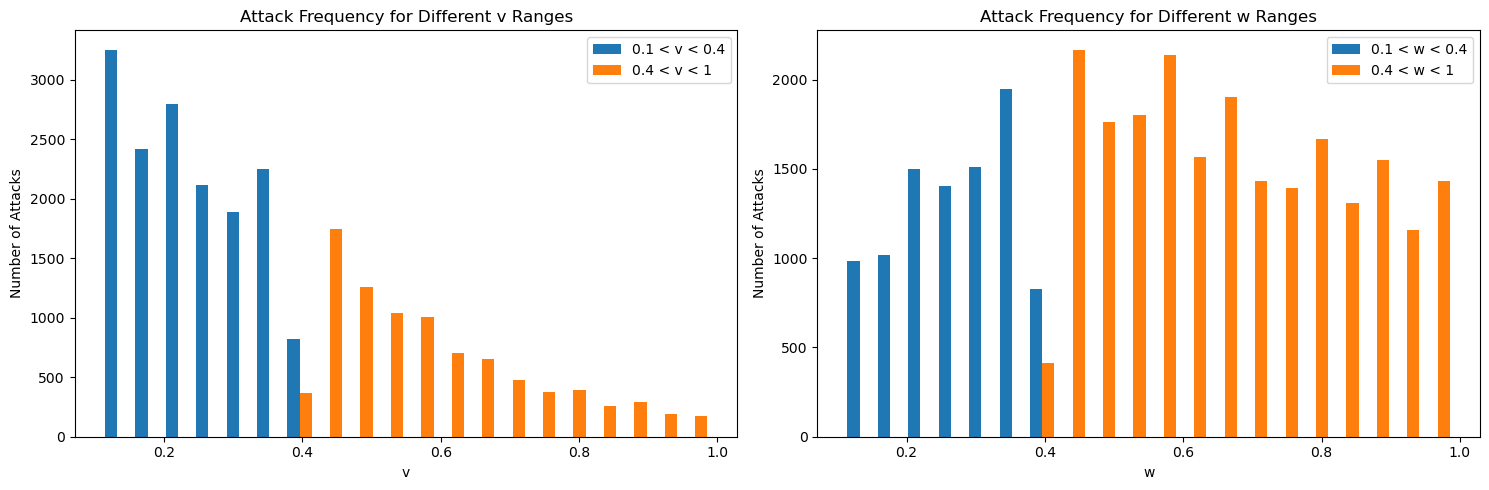

In [23]:
# Show relationship of attack frequency with probability of successful defence and asset value

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# For 'v'
# Filter for cases where (0,1) == 1 and 0.1 < v < 0.4
df_01_range1_v = df[(df['(0,1)'] == 1) & (df['v'] > 0.1) & (df['v'] < 0.4)]
# Filter for cases where (0,1) == 1 and 0.4 < v < 1
df_01_range2_v = df[(df['(0,1)'] == 1) & (df['v'] > 0.4) & (df['v'] < 1)]
# Count the number of cases in each range
count_range1_v = len(df_01_range1_v)
count_range2_v = len(df_01_range2_v)
# Create a table
data_v = {'v Range': ['0.1 < v < 0.4', '0.4 < v < 1'],
        'Number of Attacks': [count_range1_v, count_range2_v]}
table_df_v = pd.DataFrame(data_v)


# For 'w'
# Filter for cases where (0,1) == 1 and 0.1 < w < 0.4
df_01_range1_w = df[(df['(0,1)'] == 1) & (df['w'] > 0.1) & (df['w'] < 0.4)]
# Filter for cases where (0,1) == 1 and 0.4 < w < 1
df_01_range2_w = df[(df['(0,1)'] == 1) & (df['w'] > 0.4) & (df['w'] < 1)]
# Count the number of cases in each range
count_range1_w = len(df_01_range1_w)
count_range2_w = len(df_01_range2_w)
# Create a table
data_w = {'w Range': ['0.1 < w < 0.4', '0.4 < w < 1'],
        'Number of Attacks': [count_range1_w, count_range2_w]}
table_df_w = pd.DataFrame(data_w)


# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'v'
axes[0].hist([df_01_range1_v['v'], df_01_range2_v['v']], bins=20, label=['0.1 < v < 0.4', '0.4 < v < 1'])
axes[0].set_xlabel('v')
axes[0].set_ylabel('Number of Attacks')
axes[0].set_title('Attack Frequency for Different v Ranges')
axes[0].legend()

# Display the table for 'v'
#axes[0].table(cellText=table_df_v.values, colLabels=table_df_v.columns, loc='bottom')


# Plot for 'w'
axes[1].hist([df_01_range1_w['w'], df_01_range2_w['w']], bins=20, label=['0.1 < w < 0.4', '0.4 < w < 1'])
axes[1].set_xlabel('w')
axes[1].set_ylabel('Number of Attacks')
axes[1].set_title('Attack Frequency for Different w Ranges')
axes[1].legend()

# Display the table for 'w'
#axes[1].table(cellText=table_df_w.values, colLabels=table_df_w.columns, loc='bottom')


plt.tight_layout()
plt.savefig("Attack_Defence/18.png")
plt.show()

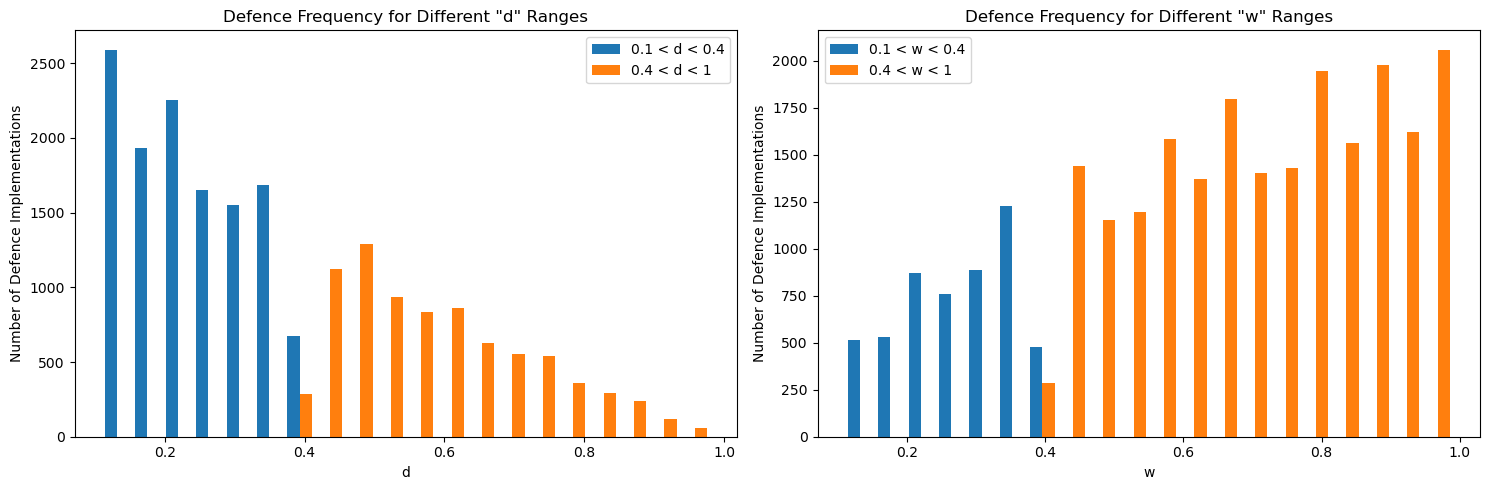

In [57]:
# Show relationship of defence implementation frequency with cost of defence and asset value.

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# For 'd'
# Filter for cases where (1,0) == 1 and 0.1 < d < 0.4
df_10_range1_d = df[(df['(1,0)'] == 1) & (df['d'] > 0.1) & (df['d'] < 0.4)]
# Filter for cases where (1,0) == 1 and 0.4 < d < 1
df_10_range2_d = df[(df['(1,0)'] == 1) & (df['d'] > 0.4) & (df['d'] < 1)]
# Count the number of cases in each range
count_range1_d = len(df_10_range1_d)
count_range2_d = len(df_10_range2_d)
# Create a table for 'd'
data_d = {'d Range': ['0.1 < d < 0.4', '0.4 < d < 1'],
        'Number of Attacks': [count_range1_d, count_range2_d]}
table_df_d = pd.DataFrame(data_d)

# For 'w'
# Filter for cases where (0,1) == 1 and 0.1 < w < 0.4
df_01_range1_w = df[(df['(1,0)'] == 1) & (df['w'] > 0.1) & (df['w'] < 0.4)]
# Filter for cases where (0,1) == 1 and 0.4 < w < 1
df_01_range2_w = df[(df['(1,0)'] == 1) & (df['w'] > 0.4) & (df['w'] < 1)]
# Count the number of cases in each range
count_range1_w = len(df_01_range1_w)
count_range2_w = len(df_01_range2_w)
# Create a table
data_w = {'w Range': ['0.1 < w < 0.4', '0.4 < w < 1'],
        'Number of Attacks': [count_range1_w, count_range2_w]}
table_df_w = pd.DataFrame(data_w)

# Create subplots for side-by-side display
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'd'
axes[0].hist([df_10_range1_d['d'], df_10_range2_d['d']], bins=20, label=['0.1 < d < 0.4', '0.4 < d < 1'])
axes[0].set_xlabel('d')
axes[0].set_ylabel('Number of Defence Implementations')
axes[0].set_title('Defence Frequency for Different "d" Ranges')
axes[0].legend()

# Plot for 'w'
axes[1].hist([df_01_range1_w['w'], df_01_range2_w['w']], bins=20, label=['0.1 < w < 0.4', '0.4 < w < 1'])
axes[1].set_xlabel('w')
axes[1].set_ylabel('Number of Defence Implementations')
axes[1].set_title('Defence Frequency for Different "w" Ranges')
axes[1].legend()

# Display the table for 'b'
#axes[1].table(cellText=table_df_b.values, colLabels=table_df_b.columns, loc='bottom')


plt.tight_layout()
plt.savefig("Attack_Defence/20.png")
plt.show()

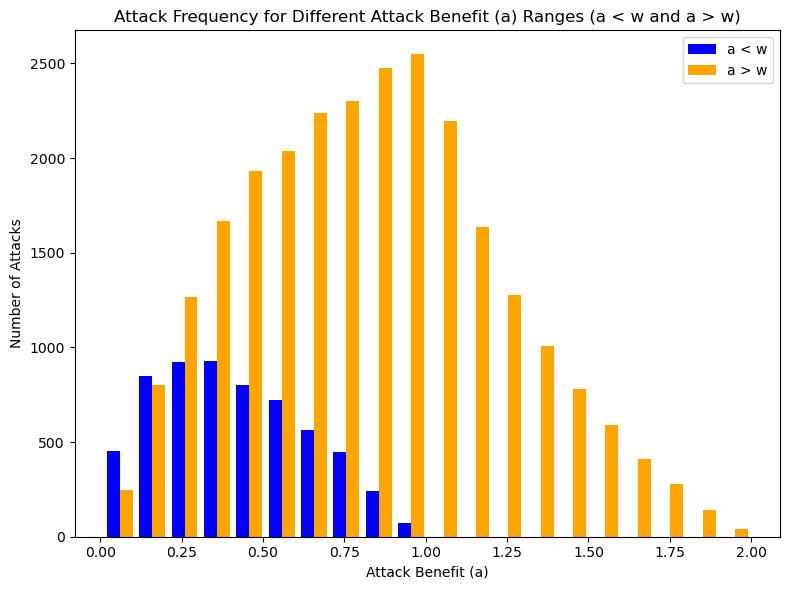

In [59]:
# prompt: like the above bar plot give me code to Show relationship of attack frequency with attack benefit values when a <w and when a>w.one plot with two colors for relationships.

# Load the Excel file
df = pd.read_excel('Random_games_stability2.xlsx')

# Filter for cases where (0,1) == 1 and a < w
df_01_a_less_w = df[(df['(0,1)'] == 1) & (df['a'] < df['w'])]

# Filter for cases where (0,1) == 1 and a > w
df_01_a_greater_w = df[(df['(0,1)'] == 1) & (df['a'] > df['w'])]

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram with different colors for a < w and a > w
ax.hist([df_01_a_less_w['a'], df_01_a_greater_w['a']], bins=20, label=['a < w', 'a > w'], color=['blue', 'orange'])

# Customize the plot
ax.set_xlabel('Attack Benefit (a)')
ax.set_ylabel('Number of Attacks')
ax.set_title('Attack Frequency for Different Attack Benefit (a) Ranges (a < w and a > w)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.savefig("Attack_Defence/21.png")
plt.show()